<a href="https://colab.research.google.com/github/Marinagp25/Python/blob/main/ICR_Identificando_condi%C3%A7%C3%B5es_relacionadas_%C3%A0_idade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
!pip3 install --upgrade pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ICR - Identificando condições relacionadas à idade'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/ICR - Identificando condições relacionadas à idade/sample_submission.csv
/content/drive/MyDrive/ICR - Identificando condições relacionadas à idade/train.csv
/content/drive/MyDrive/ICR - Identificando condições relacionadas à idade/greeks.csv
/content/drive/MyDrive/ICR - Identificando condições relacionadas à idade/test.csv


In [4]:
train = pd.read_csv("/content/drive/MyDrive/ICR - Identificando condições relacionadas à idade/train.csv", sep =',')
test = pd.read_csv("/content/drive/MyDrive/ICR - Identificando condições relacionadas à idade/test.csv", sep =',')
arq = pd.read_csv("/content/drive/MyDrive/ICR - Identificando condições relacionadas à idade/greeks.csv", sep =',')

In [5]:
print(arq)


               Id Alpha Beta Gamma Delta    Epsilon
0    000ff2bfdfe9     B    C     G     D  3/19/2019
1    007255e47698     A    C     M     B    Unknown
2    013f2bd269f5     A    C     M     B    Unknown
3    043ac50845d5     A    C     M     B    Unknown
4    044fb8a146ec     D    B     F     B  3/25/2020
..            ...   ...  ...   ...   ...        ...
612  fd3dafe738fd     A    B     M     B  9/13/2020
613  fd895603f071     A    B     M     B   9/8/2020
614  fd8ef6377f76     A    C     M     B  7/24/2019
615  fe1942975e40     A    C     M     B  1/31/2019
616  ffcca4ded3bb     A    C     M     B    Unknown

[617 rows x 6 columns]


In [6]:
print(train)

               Id        AB          AF          AH          AM         AR  \
0    000ff2bfdfe9  0.209377  3109.03329   85.200147   22.394407   8.138688   
1    007255e47698  0.145282   978.76416   85.200147   36.968889   8.138688   
2    013f2bd269f5  0.470030  2635.10654   85.200147   32.360553   8.138688   
3    043ac50845d5  0.252107  3819.65177  120.201618   77.112203   8.138688   
4    044fb8a146ec  0.380297  3733.04844   85.200147   14.103738   8.138688   
..            ...       ...         ...         ...         ...        ...   
612  fd3dafe738fd  0.149555  3130.05946  123.763599    9.513984  13.020852   
613  fd895603f071  0.435846  5462.03438   85.200147   46.551007  15.973224   
614  fd8ef6377f76  0.427300  2459.10720  130.138587   55.355778  10.005552   
615  fe1942975e40  0.363205  1263.53524   85.200147   23.685856   8.138688   
616  ffcca4ded3bb  0.482849  2672.53426  546.663930  112.006102   8.138688   

           AX        AY         AZ          BC  ...         FL 

In [7]:
train.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

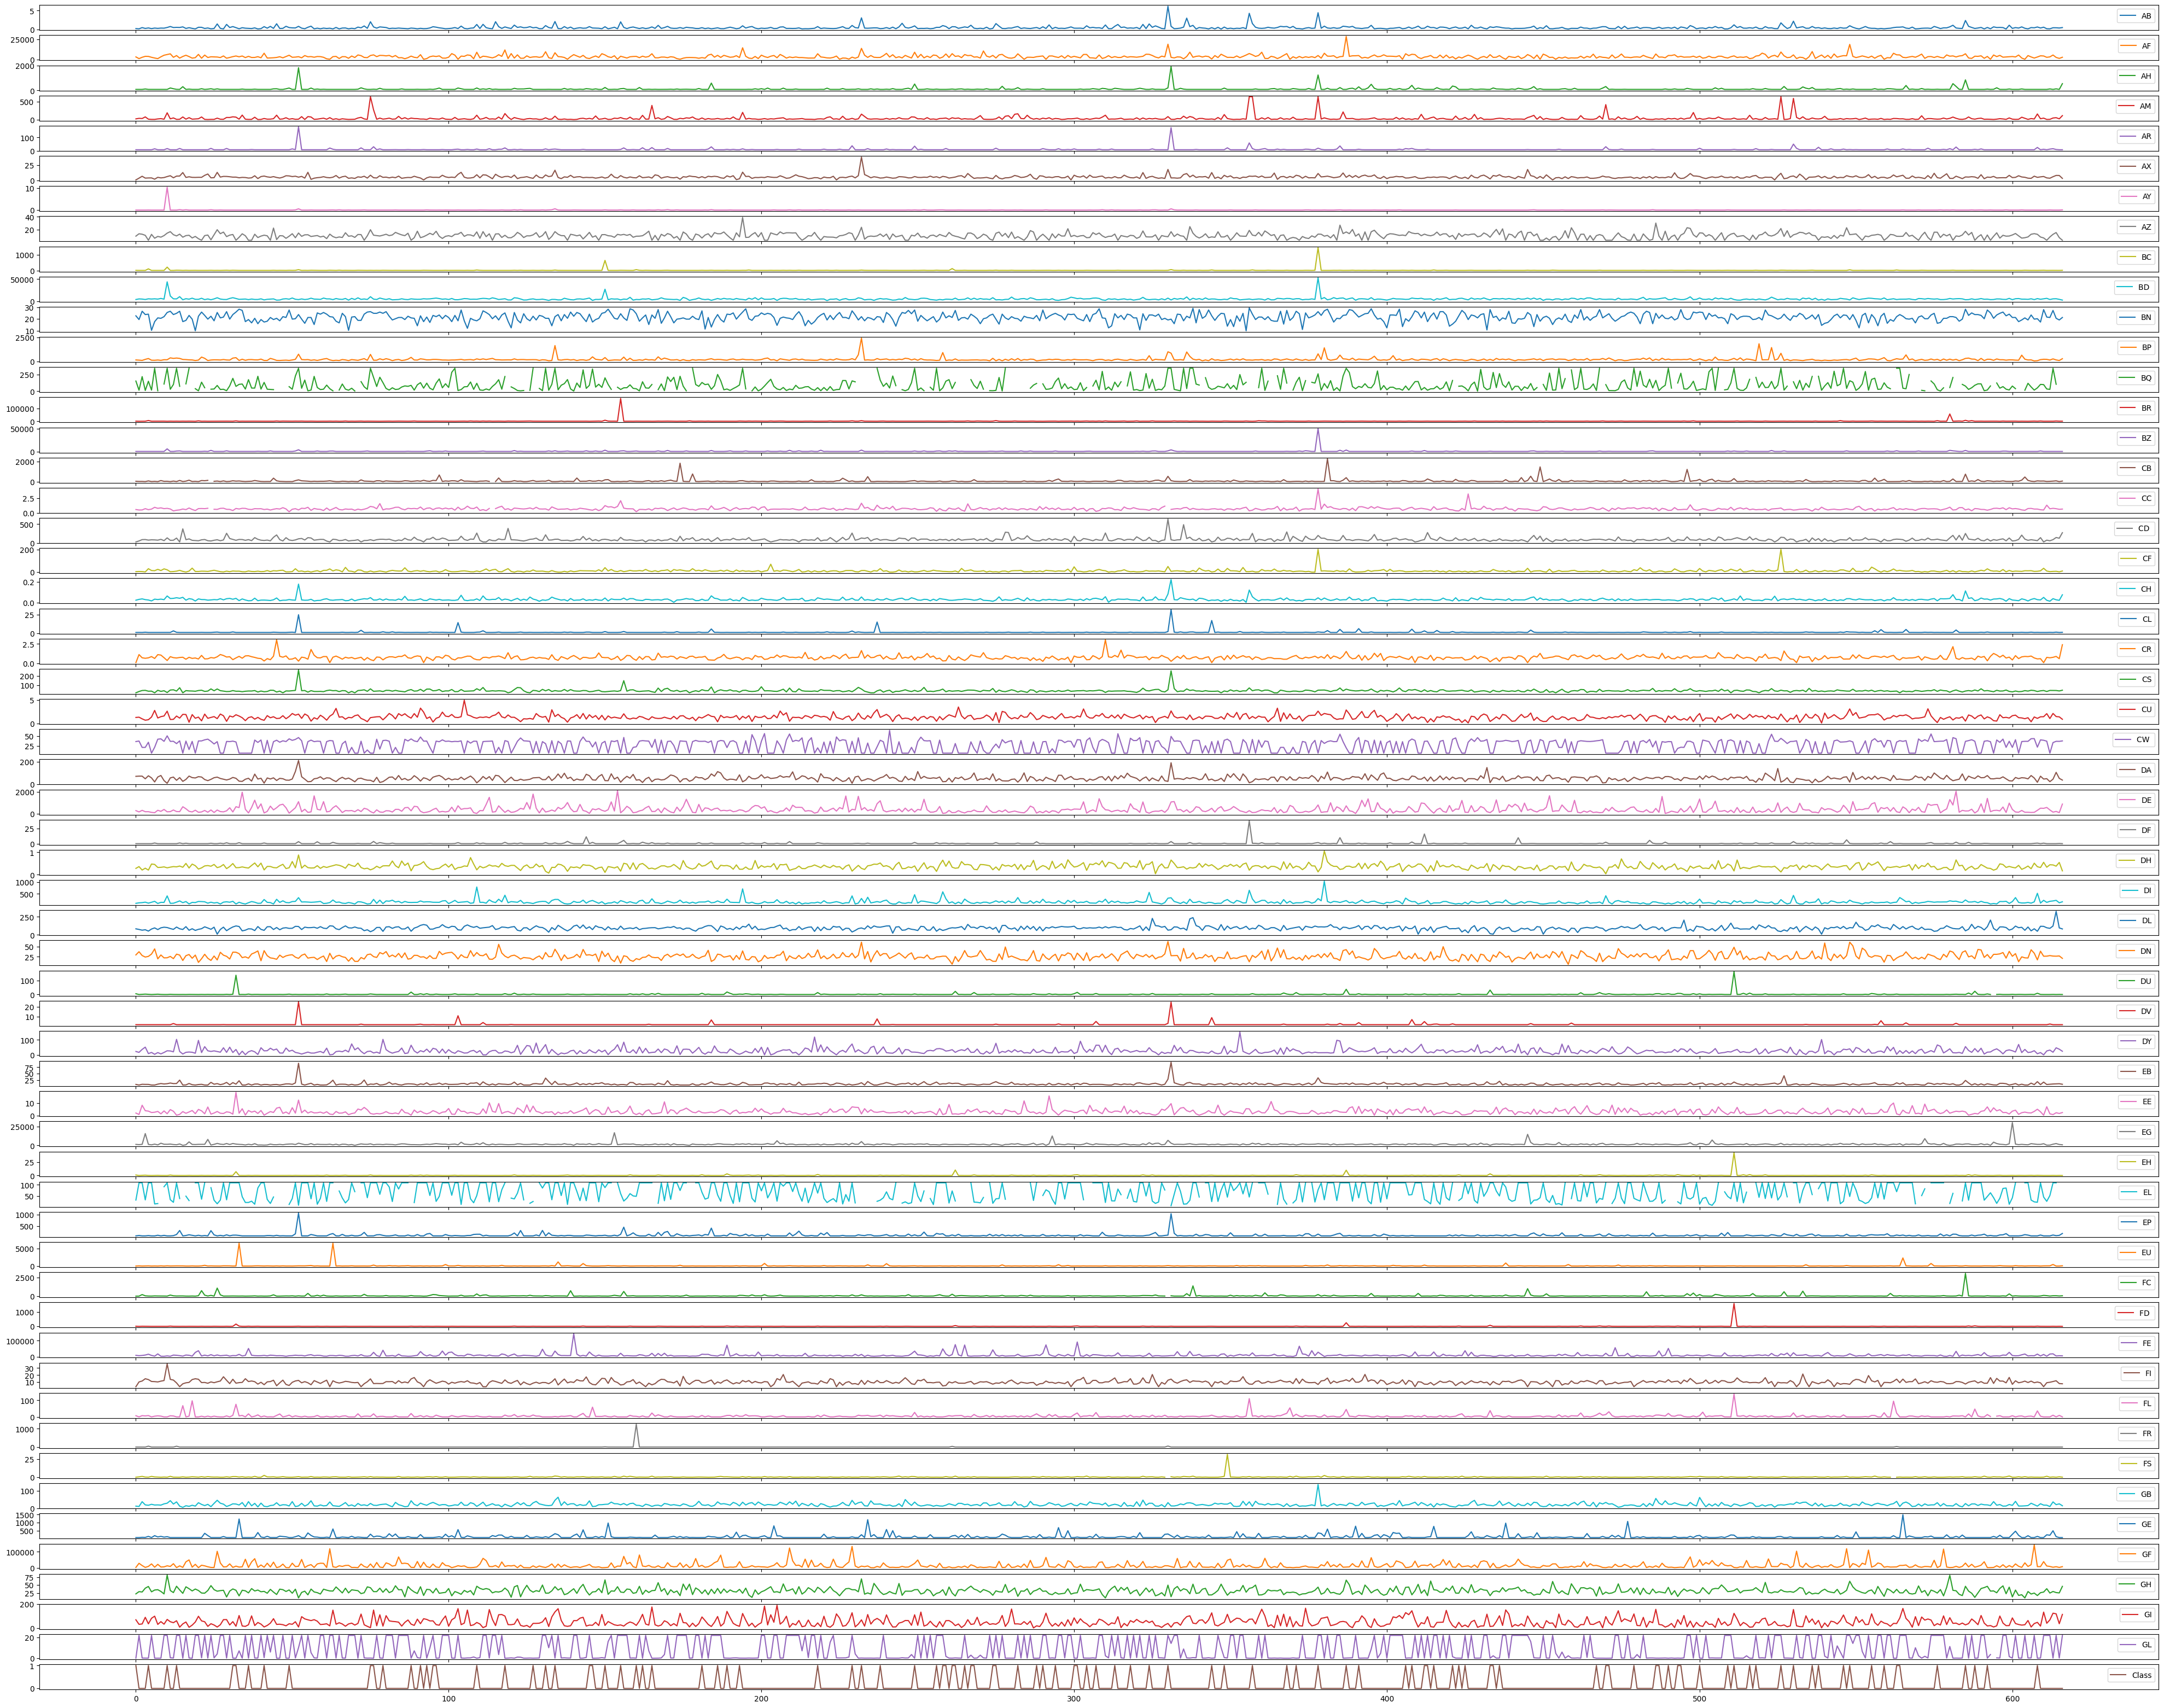

In [8]:
graf = train.plot(figsize=(50,40), subplots=True)

In [9]:
train.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


import numpy as np
from google.colab import autoviz
df_2037502067076672721 = autoviz.get_registered_df('df_2037502067076672721')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2037502067076672721, *['AB'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2037502067076672721 = autoviz.get_registered_df('df_2037502067076672721')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2037502067076672721, *['AF'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2037502067076672721 = autoviz.get_registered_df('df_2037502067076672721')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2037502067076672721, *['AH'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2037502067076672721 = autoviz.get_registered_df('df_2037502067076672721')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2037502067076672721, *['AM'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2037502067076672721 = autoviz.get_registered_df('df_2037502067076672721')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2037502067076672721, *['AB'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2037502067076672721 = autoviz.get_registered_df('df_2037502067076672721')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2037502067076672721, *['AF'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2037502067076672721 = autoviz.get_registered_df('df_2037502067076672721')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2037502067076672721, *['AH'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2037502067076672721 = autoviz.get_registered_df('df_2037502067076672721')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2037502067076672721, *['AM'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2037502067076672721 = autoviz.get_registered_df('df_2037502067076672721')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_2037502067076672721, *[[['AB', 'AF'], ['AF', 'AH'], ['AH', 'AM'], ['AM', 'AR']]], **{})
chart

In [13]:
import numpy as np
from google.colab import autoviz
df_2037502067076672721 = autoviz.get_registered_df('df_2037502067076672721')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

valor = input('Digite a coluna desejada: ', )
tranf = valor.upper()
chart = value_plot(df_2037502067076672721, *[tranf], **{})
chart

Digite a coluna desejada: ab


In [14]:
arq.sort_values(by=["Epsilon"])

,Id,Alpha,Beta,Gamma,Delta,Epsilon
486,c5c8ffd0c908,B,C,H,D,1/11/2018
408,9ef1886b810c,B,C,G,D,1/16/2018
21,0ce8b2aeeead,A,C,N,B,1/2/2020
555,e253dc2f97c0,B,C,G,D,1/23/2018
593,f44978084805,A,C,N,B,1/23/2020
...,...,...,...,...,...,...
114,2e4e80b95e24,A,C,M,B,Unknown
517,d10976c44b2b,A,C,M,B,Unknown
334,8296caddae14,A,C,M,B,Unknown
116,2f020a35ce2b,A,C,M,B,Unknown


In [15]:
arq['Alpha'].unique()

array(['B', 'A', 'D', 'G'], dtype=object)

In [16]:
arq['Beta'].unique()

array(['C', 'B', 'A'], dtype=object)

In [17]:
arq['Gamma'].unique()

array(['G', 'M', 'F', 'N', 'E', 'H', 'A', 'B'], dtype=object)

In [18]:
arq['Delta'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [19]:
arq.describe()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
count,617,617,617,617,617,617
unique,617,4,3,8,4,198
top,000ff2bfdfe9,A,C,M,B,Unknown
freq,1,509,407,445,456,144


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from numpy import array

In [21]:
labelencoder = LabelEncoder()

In [22]:
df = ({'Alpha': ['B', 'A', 'D', 'G'],
                   'Beta': ['C', 'B', 'A'],
                   'Gamma': ['G', 'M', 'F', 'N', 'E', 'H', 'A', 'B'],
                   'Delta': ['D', 'B', 'C', 'A']})

print(df)

{'Alpha': ['B', 'A', 'D', 'G'], 'Beta': ['C', 'B', 'A'], 'Gamma': ['G', 'M', 'F', 'N', 'E', 'H', 'A', 'B'], 'Delta': ['D', 'B', 'C', 'A']}


In [23]:
arq[['Alpha', 'Beta', 'Gamma', 'Delta']] = arq[['Alpha', 'Beta', 'Gamma', 'Delta']].apply(LabelEncoder().fit_transform)
arq

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,1,2,4,3,3/19/2019
1,007255e47698,0,2,6,1,Unknown
2,013f2bd269f5,0,2,6,1,Unknown
3,043ac50845d5,0,2,6,1,Unknown
4,044fb8a146ec,2,1,3,1,3/25/2020
...,...,...,...,...,...,...
612,fd3dafe738fd,0,1,6,1,9/13/2020
613,fd895603f071,0,1,6,1,9/8/2020
614,fd8ef6377f76,0,2,6,1,7/24/2019
615,fe1942975e40,0,2,6,1,1/31/2019


In [24]:
arq['Alpha'].unique()

array([1, 0, 2, 3])

In [25]:
arq['Beta'].unique()

array([2, 1, 0])

In [26]:
arq['Gamma'].unique()

array([4, 6, 3, 7, 2, 5, 0, 1])

In [27]:
arq['Delta'].unique()

array([3, 1, 2, 0])

In [28]:
x_train = arq.iloc[:,1:4].values
x_train

array([[1, 2, 4],
       [0, 2, 6],
       [0, 2, 6],
       ...,
       [0, 2, 6],
       [0, 2, 6],
       [0, 2, 6]])

In [29]:
y_train = arq.iloc[:, 1:4].values
print(y_train)

[[1 2 4]
 [0 2 6]
 [0 2 6]
 ...
 [0 2 6]
 [0 2 6]
 [0 2 6]]


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size= 0.25, random_state=0)

In [31]:
x_train.shape, y_train.shape

((462, 3), (462, 3))

In [32]:
x_test.shape,y_test.shape

((155, 3), (155, 3))

In [33]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 400, activation= 'relu', input_shape=(3, )))
model.add(tf.keras.layers.Dense(units = 200, activation='softmax'))
model.add(tf.keras.layers.Dense(units = 100, activation='softmax'))
model.add(tf.keras.layers.Dense(units = 3, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               1600      
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 102,203
Trainable params: 102,203
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = 'accuracy')
hist = model.fit(x_train, y_train, epochs = 85, validation_split = 0.2)

Epoch 1/85
12/12 [==============================] - 2s 24ms/step - loss: 12.3304 - accuracy: 0.0000e+00 - val_loss: 12.2312 - val_accuracy: 0.0000e+00
Epoch 2/85
12/12 [==============================] - 0s 7ms/step - loss: 12.1971 - accuracy: 0.0000e+00 - val_loss: 12.0997 - val_accuracy: 0.0000e+00
Epoch 3/85
12/12 [==============================] - 0s 14ms/step - loss: 12.0639 - accuracy: 0.0000e+00 - val_loss: 11.9683 - val_accuracy: 0.0000e+00
Epoch 4/85
12/12 [==============================] - 0s 10ms/step - loss: 11.9315 - accuracy: 0.0000e+00 - val_loss: 11.8363 - val_accuracy: 0.0000e+00
Epoch 5/85
12/12 [==============================] - 0s 11ms/step - loss: 11.7994 - accuracy: 0.0000e+00 - val_loss: 11.7085 - val_accuracy: 0.0000e+00
Epoch 6/85
12/12 [==============================] - 0s 12ms/step - loss: 11.6722 - accuracy: 0.0000e+00 - val_loss: 11.5827 - val_accuracy: 0.0000e+00
Epoch 7/85
12/12 [==============================] - 0s 11ms/step - loss: 11.5456 - accuracy: 0.

In [35]:
hist.history

{'loss': [12.330382347106934,
  12.197081565856934,
  12.063876152038574,
  11.931496620178223,
  11.799449920654297,
  11.672161102294922,
  11.545612335205078,
  11.422595977783203,
  11.300484657287598,
  11.180656433105469,
  11.061585426330566,
  10.944025993347168,
  10.828559875488281,
  10.713385581970215,
  10.59900188446045,
  10.48659896850586,
  10.37442684173584,
  10.26431941986084,
  10.153465270996094,
  10.045095443725586,
  9.936902046203613,
  9.829578399658203,
  9.723489761352539,
  9.618084907531738,
  9.5131254196167,
  9.409820556640625,
  9.306663513183594,
  9.205379486083984,
  9.103838920593262,
  9.003440856933594,
  8.903576850891113,
  8.804935455322266,
  8.706255912780762,
  8.609821319580078,
  8.51318073272705,
  8.418429374694824,
  8.323057174682617,
  8.229497909545898,
  8.136643409729004,
  8.044942855834961,
  7.953381061553955,
  7.862706184387207,
  7.773233890533447,
  7.683775901794434,
  7.596303939819336,
  7.50931978225708,
  7.4226207733

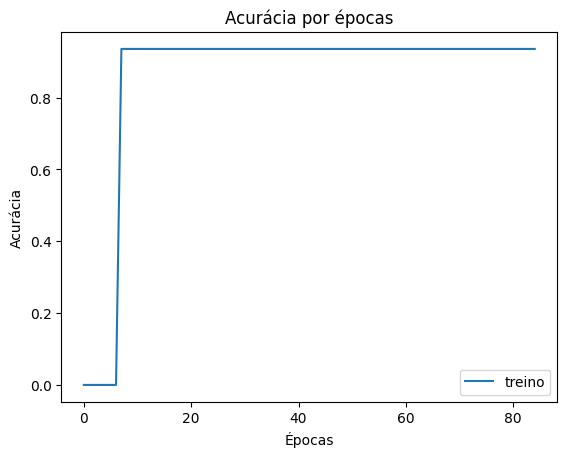

In [36]:
plt.plot(hist.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino', 'validação'])

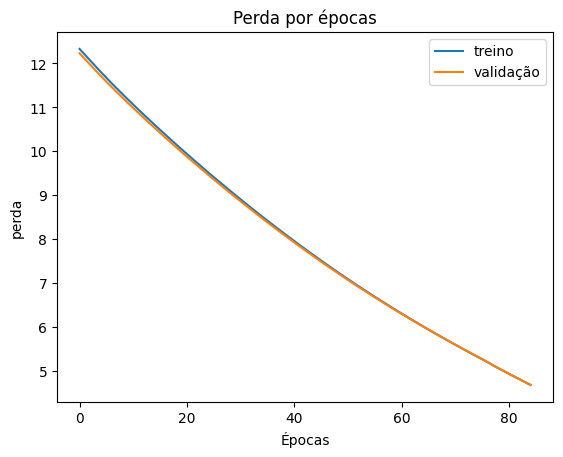

In [37]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [38]:
novo = arq[['Alpha', 'Beta', 'Gamma', 'Delta']]
dados =[]
dados = novo.values.tolist()
print(dados)



[[1, 2, 4, 3], [0, 2, 6, 1], [0, 2, 6, 1], [0, 2, 6, 1], [2, 1, 3, 1], [0, 2, 6, 1], [0, 2, 6, 1], [0, 2, 6, 1], [0, 2, 6, 1], [0, 1, 6, 1], [2, 1, 3, 1], [0, 2, 7, 1], [0, 2, 7, 1], [2, 1, 2, 1], [0, 2, 6, 2], [0, 2, 6, 1], [0, 1, 6, 0], [0, 2, 7, 1], [0, 2, 6, 1], [0, 2, 6, 1], [0, 2, 6, 1], [0, 2, 7, 1], [0, 1, 6, 1], [0, 2, 6, 1], [0, 1, 6, 1], [0, 1, 6, 0], [0, 2, 7, 1], [0, 2, 6, 1], [0, 1, 6, 1], [0, 2, 7, 1], [0, 2, 6, 1], [2, 1, 2, 0], [1, 1, 5, 1], [0, 1, 6, 1], [0, 2, 6, 3], [0, 2, 6, 1], [1, 1, 5, 0], [0, 2, 6, 1], [0, 2, 6, 1], [0, 1, 6, 1], [0, 2, 6, 1], [3, 1, 0, 1], [0, 2, 6, 1], [0, 2, 7, 1], [0, 2, 6, 1], [0, 2, 6, 1], [0, 2, 6, 1], [0, 2, 6, 1], [0, 2, 6, 1], [3, 2, 1, 1], [0, 2, 6, 1], [0, 1, 6, 0], [0, 2, 7, 1], [0, 2, 6, 1], [0, 1, 6, 1], [0, 1, 6, 1], [0, 1, 6, 1], [0, 1, 6, 0], [0, 2, 7, 1], [0, 1, 6, 0], [0, 2, 6, 2], [0, 2, 7, 1], [0, 2, 6, 2], [0, 1, 6, 1], [0, 2, 6, 1], [0, 2, 6, 1], [0, 1, 6, 1], [0, 2, 6, 1], [0, 2, 6, 1], [0, 1, 6, 1], [0, 1, 6, 1], [0, 2

In [39]:
mostrar = pd.DataFrame(novo)
mostrar.rename(columns={'0':'Alpha', '1':'Beta', '2':'Gamma', '3':'Delta'}, inplace = True)
print(mostrar)


mostrar.to_csv("sample_submission.csv", index = True)

     Alpha  Beta  Gamma  Delta
0        1     2      4      3
1        0     2      6      1
2        0     2      6      1
3        0     2      6      1
4        2     1      3      1
..     ...   ...    ...    ...
612      0     1      6      1
613      0     1      6      1
614      0     2      6      1
615      0     2      6      1
616      0     2      6      1

[617 rows x 4 columns]


In [41]:
mostrar.value_counts('Alpha')

Alpha
0    509
1     61
3     29
2     18
Name: count, dtype: int64

In [42]:
mostrar.value_counts('Beta')

Beta
2    407
1    202
0      8
Name: count, dtype: int64

In [43]:
mostrar.value_counts('Gamma')

Gamma
6    445
7     64
5     53
1     18
0     11
3     10
2      8
4      8
Name: count, dtype: int64

In [44]:
mostrar.value_counts('Delta')

Delta
1    456
0     75
2     64
3     22
Name: count, dtype: int64

In [47]:
sample_submission = pd.read_csv("/content/sample_submission.csv")
print(sample_submission)

     Unnamed: 0  Alpha  Beta  Gamma  Delta
0             0      1     2      4      3
1             1      0     2      6      1
2             2      0     2      6      1
3             3      0     2      6      1
4             4      2     1      3      1
..          ...    ...   ...    ...    ...
612         612      0     1      6      1
613         613      0     1      6      1
614         614      0     2      6      1
615         615      0     2      6      1
616         616      0     2      6      1

[617 rows x 5 columns]
